In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
import re

sns.set()


def gethighest(vals, prefix="logall_"):
        m = np.argmax([int(re.search(f'{prefix}(\d+)', val).group(1)) for val in vals])
        return vals[m]

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

        
def readparams(file):
    params = {} 
    with open(file) as f:
        for line in f:
            line = line[:-1]  # remove \n
            if not line or line.startswith('#') or line.startswith('import'):
                continue
            key, val = line.split('=')
            if val.lower() == 'true' or val.lower() == 'false':
                params[key] = val.lower() == 'true'
            else:
                try:
                    params[key] = float(val)
                except ValueError:
                    params[key] = val
    return params

In [248]:
params = []
prefix = '../../../..'

paths = sorted([]
                  + glob.glob(f"{prefix}/logs/lions*-2019-07-21*/**/rep00/", recursive=True)
                   + glob.glob(f"{prefix}/logs/lions*-2019-07-22*/**/rep00/", recursive=True)
                  )
#paths = sorted(glob.glob(f"{prefix}/logs/lions-nvar-*-2019-06-*/**/rep00/", recursive=True))
for path in paths:
    print(path)
    try:
        logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    except Exception as e:
        print(e)
        continue
    curparam = readparams(glob.glob(path + 'properties*')[0])
    params.append((path, curparam, logall.query(f'nbOnOpp == {curparam["nOpti"]}')['curCoopNoCoef'].mean()))



../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0353/lion_megabig/o60/mt_false/run_01/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0353/lion_megabig/o60/mt_false/run_02/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0359/lion_megabig/o10/mt_false/run_01/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0359/lion_megabig/o10/mt_false/run_02/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0431/lion_megabig/o20/mt_false/run_01/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0431/lion_megabig/o20/mt_false/run_02/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0456/lion_megabig/o30/mt_false/run_01/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0456/lion_megabig/o30/mt_false/run_02/rep00/
../../../../logs/lions-work-tol20-pop100-fake_1-b10-nopti-2-2019-07-21-0

In [252]:
diffkeys = set()
missingkeys = set()
for i in range(len(params)):
    for key in params[i][1].keys():
        try:
            if any(params[j][1][key] != params[i][1][key] for j in range(0, len(params) - 1)):
                diffkeys.add(key)
        except KeyError:
            missingkeys.add(key)

In [253]:
excluded = ['gSeed', 'gLogFilename', 'path']
processed = []
for elem in params:
    param = elem[1]
    ess = param['meanA'] / 2
    so = param['meanA'] + param['b'] / 2
    outdict = {'coop': (elem[2] - ess) / (so - ess) , 'truecoop': elem[2]}
    for key in diffkeys:
        if key in excluded: continue
        outdict[key] = elem[1][key]
    processed.append(outdict)
    for key in missingkeys:
        if key in excluded: continue
        outdict[key] = elem[1].get(key, False)
df = pd.DataFrame(processed)
normalized_df=(df-df.mean())/df.std()

In [254]:
df

,coop,gNbOfPhysicalObjects,gRandomSeed,nOpti,nTolerance,truecoop
0,-0.059680,60.0,9.526891e+08,2.0,2.0,2.052399
1,0.738357,60.0,9.526872e+08,2.0,2.0,8.037680
2,NaN,10.0,1.312550e+09,2.0,2.0,NaN
3,NaN,10.0,1.312552e+09,2.0,2.0,NaN
4,NaN,20.0,-1.066272e+09,2.0,2.0,NaN
5,-0.220761,20.0,-1.066272e+09,2.0,2.0,0.844294
6,-0.044049,30.0,4.656398e+08,2.0,2.0,2.169635
7,-0.309333,30.0,4.656378e+08,2.0,2.0,0.180003
8,0.300879,40.0,-1.811847e+09,2.0,2.0,4.756594
9,0.123719,40.0,-1.811847e+09,2.0,2.0,3.427896


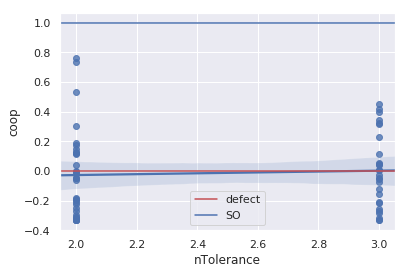

In [257]:
sns.regplot(x='nTolerance', y='coop', data=df)
plt.axhline(0, label='defect', c='r')
plt.axhline(1, label='SO', c='b')
plt.legend()

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
normalized_df['nbRobots'] = normalized_df['gInitialNumberOfRobots']
normalized_df['tau'] = normalized_df['oppDecay']
normalized_df['coopVariability'] = normalized_df['fakeCoef']
normalized_df

In [258]:
result = sm.ols(formula="coop ~ nOpti + nTolerance + gNbOfPhysicalObjects", data=normalized_df).fit()

In [259]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coop   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2728
Date:                Tue, 06 Aug 2019   Prob (F-statistic):              0.845
Time:                        11:17:10   Log-Likelihood:                -84.197
No. Observations:                  60   AIC:                             176.4
Df Residuals:                      56   BIC:                             184.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0131      0.138      0.095      0.924      -0.263       0.289
nOpti                   -0.1022      0.133     -0.770      0.445      -0.368       0.164
nTolerance               0.0554      0.133      0.416      0.679      -0.211       0.322
gNbOfPhysicalObjects    -0.0435      0.150     -0.290      0.773      -0.343       0.257
==============================================================================
Omnibus:                        9.667   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.468
Skew:                           0.944   Prob(JB):                      0.00879
Kurtosis:                       3.473   Cond. No.                         1.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
df

,coop,gNbOfPhysicalObjects,gRandomSeed,truecoop
0,0.031440,100.0,-849859442.0,2.735801
1,0.093465,100.0,-849858189.0,3.200991
2,0.578437,1001.0,-839987968.0,6.838281
3,0.462336,1001.0,-839988108.0,5.967521
4,-0.048876,20.0,-850061013.0,2.133428
5,-0.002350,20.0,-850060998.0,2.482373
6,-0.046499,400.0,-839715108.0,2.151255
7,-0.018599,400.0,-839714667.0,2.360505
8,0.483211,600.0,-839829251.0,6.124079
9,0.551116,600.0,-839827969.0,6.633371
